In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from pathlib import Path
import pickle
from PIL import Image

import matplotlib.pyplot as plt

from fastai.vision import ImageDataBunch
from fastai.vision import LabelLists
from fastai.vision import get_transforms

In [3]:
import torch; torch.__version__

'1.2.0.dev20190726'

In [4]:
cifar100_stats = (torch.tensor([0.5070751592371323, 0.48654887331495095, 0.4409178433670343]),
 torch.tensor([0.26733428587924035, 0.2564384629170881, 0.2761504713256853]))

In [5]:
path = Path('cifar100')
train_file = 'train'
test_file = 'test'

In [6]:
data = ImageDataBunch.from_folder(path,
                                  train='train_data',
                                  valid='valid_data',
                                  ds_tfms=get_transforms(),
                                  num_workers=0,
                                  bs=1024
                                 )


In [7]:
data.normalize(cifar100_stats)

ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
0,0,0,0,0
Path: cifar100;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
0,0,0,0,0
Path: cifar100;

Test: None

Wall time: 4.65 s


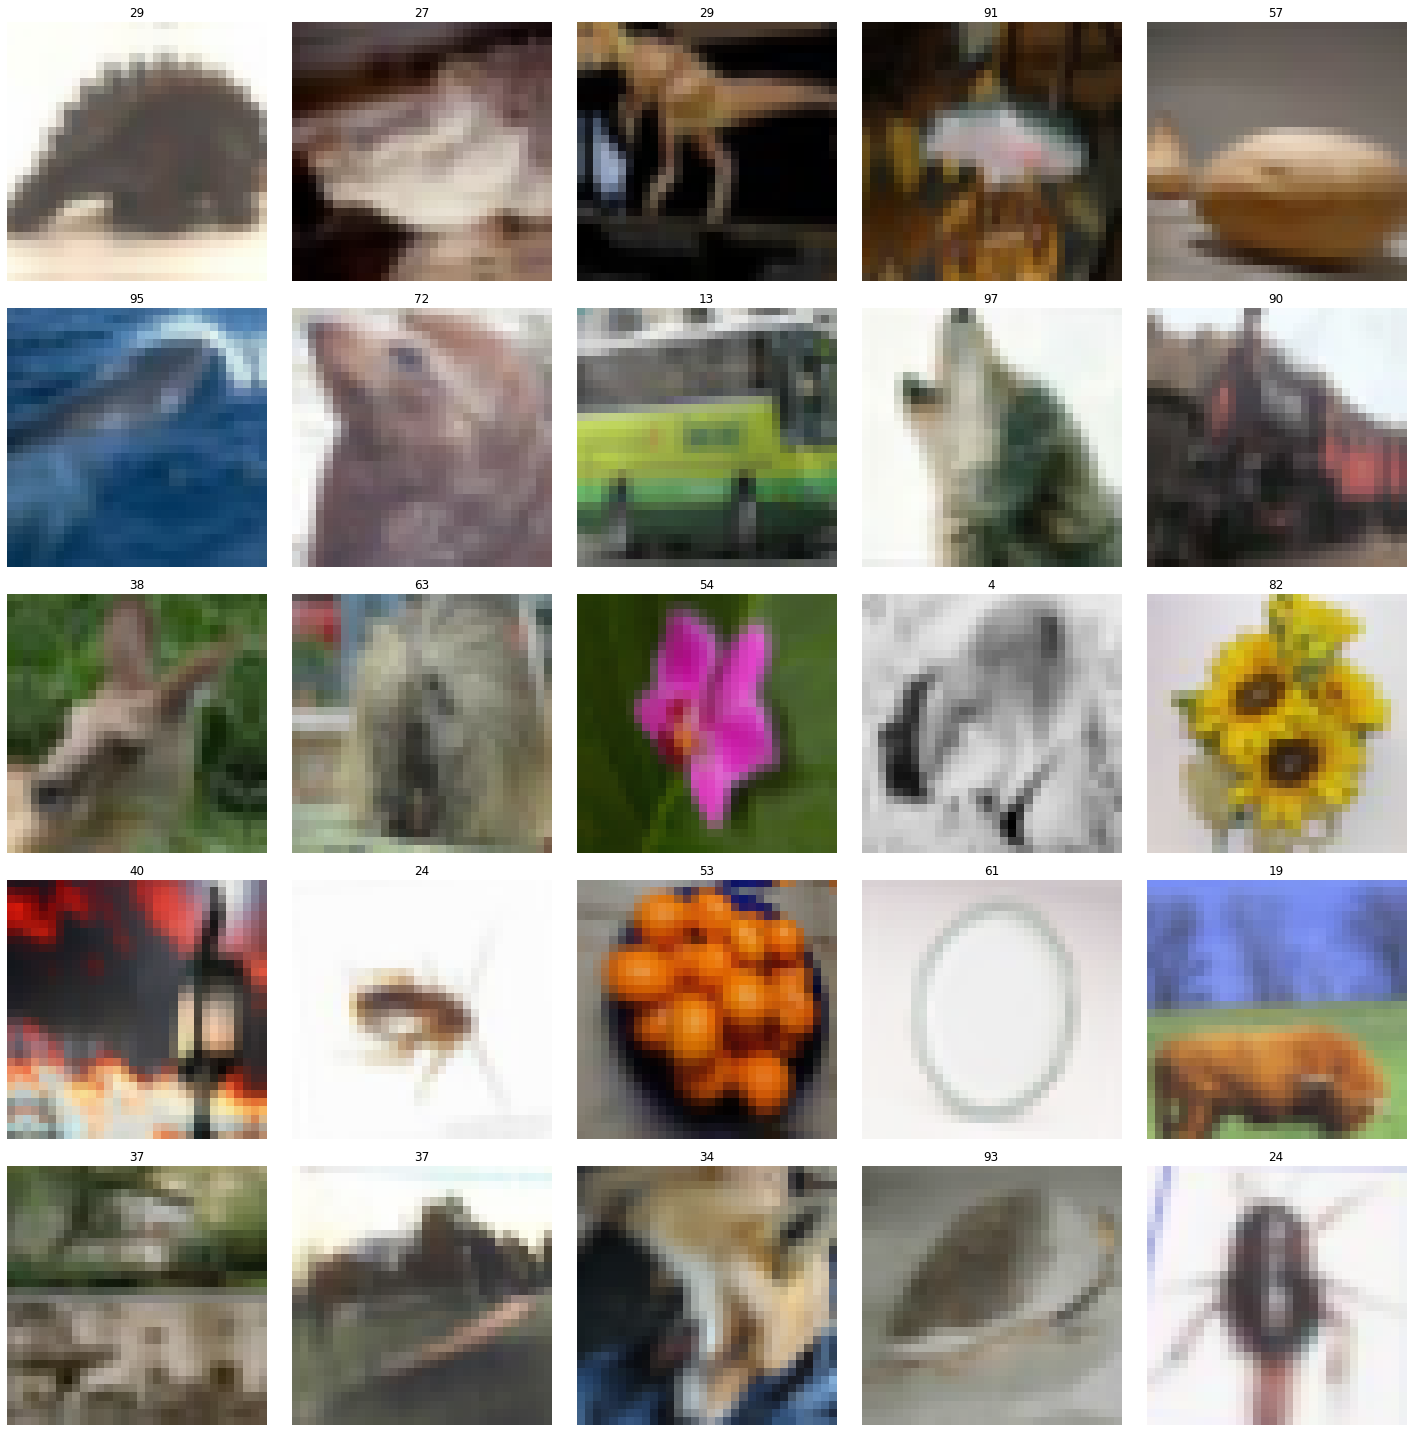

In [8]:
%%time
data.show_batch()

In [9]:
from torchvision import models
from fastai.vision import cnn_learner, accuracy, error_rate

In [9]:
learn = cnn_learner(data, models.resnet18, metrics=[error_rate, accuracy], pretrained=False)

In [43]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


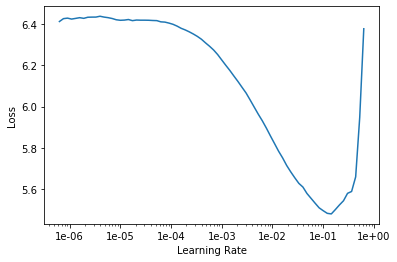

In [44]:
learn.recorder.plot()

In [10]:
from fastai.callbacks import SaveModelCallback

In [48]:
learn.fit_one_cycle(100, 1e-2, callbacks=SaveModelCallback(learn, name='resnet18_best'))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,3.684599,3.539095,0.829400,0.170600,01:23
1,3.661116,3.533884,0.826100,0.173900,01:28
2,3.637584,3.443019,0.818800,0.181200,01:33
3,3.610347,3.404069,0.812100,0.187900,01:28
4,3.566113,3.359666,0.806200,0.193800,01:24
5,3.526471,3.302387,0.796100,0.203900,01:25
6,3.468064,3.265655,0.796300,0.203700,01:25
7,3.423923,3.220798,0.784800,0.215200,01:24
8,3.349041,3.119599,0.763500,0.236500,01:24
9,3.266848,3.068004,0.756500,0.243500,01:27


Better model found at epoch 0 with valid_loss value: 3.539094924926758.
Better model found at epoch 1 with valid_loss value: 3.533884286880493.
Better model found at epoch 2 with valid_loss value: 3.443019151687622.
Better model found at epoch 3 with valid_loss value: 3.4040687084198.
Better model found at epoch 4 with valid_loss value: 3.359665632247925.
Better model found at epoch 5 with valid_loss value: 3.302386999130249.
Better model found at epoch 6 with valid_loss value: 3.265655279159546.
Better model found at epoch 7 with valid_loss value: 3.2207984924316406.
Better model found at epoch 8 with valid_loss value: 3.1195993423461914.
Better model found at epoch 9 with valid_loss value: 3.0680043697357178.
Better model found at epoch 10 with valid_loss value: 2.9930527210235596.
Better model found at epoch 11 with valid_loss value: 2.921499490737915.
Better model found at epoch 12 with valid_loss value: 2.8831677436828613.
Better model found at epoch 14 with valid_loss value: 2.78

KeyboardInterrupt: 

In [49]:
learn.mixup()

Learner(data=ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
0,0,0,0,0
Path: cifar100;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
0,0,0,0,0
Path: cifar100;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (co

In [50]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


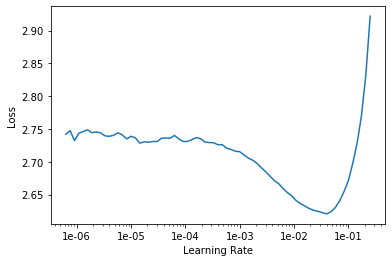

In [51]:
learn.recorder.plot()

In [52]:
learn.fit_one_cycle(20, 8e-3, callbacks=SaveModelCallback(learn, name='resnet18_mixup_best'))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.612432,1.951376,0.509300,0.490700,01:21
1,2.451968,1.908818,0.496900,0.503100,01:22
2,2.371654,1.894474,0.487900,0.512100,01:21
3,2.347642,1.953148,0.507500,0.492500,01:31
4,2.346386,2.041557,0.522100,0.477900,01:32
5,2.357399,2.032150,0.516900,0.483100,01:34
6,2.351927,1.975747,0.507700,0.492300,01:29
7,2.330228,2.028065,0.514800,0.485200,01:29
8,2.309005,1.983214,0.506500,0.493500,01:29
9,2.266371,1.995203,0.508300,0.491700,01:29


Better model found at epoch 0 with valid_loss value: 1.95137619972229.
Better model found at epoch 1 with valid_loss value: 1.9088181257247925.
Better model found at epoch 2 with valid_loss value: 1.8944743871688843.
Better model found at epoch 17 with valid_loss value: 1.8790210485458374.
Better model found at epoch 18 with valid_loss value: 1.8781919479370117.


In [53]:
learn.fit_one_cycle(60, 2e-4, callbacks=SaveModelCallback(learn, name='resnet18_mixup_best2'), wd=0.1)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.899604,1.879239,0.471700,0.528300,01:23
1,1.886573,1.877223,0.470900,0.529100,01:24
2,1.887426,1.877854,0.471400,0.528600,01:23
3,1.898541,1.878977,0.471300,0.528700,01:21
4,1.893189,1.873574,0.470300,0.529700,01:25
5,1.885780,1.873764,0.472000,0.528000,01:22
6,1.881801,1.876105,0.470700,0.529300,01:21
7,1.886459,1.876190,0.470900,0.529100,01:21
8,1.889211,1.871285,0.469600,0.530400,01:21
9,1.886887,1.869621,0.469000,0.531000,01:21


Better model found at epoch 0 with valid_loss value: 1.8792387247085571.
Better model found at epoch 1 with valid_loss value: 1.877223014831543.
Better model found at epoch 4 with valid_loss value: 1.873573660850525.
Better model found at epoch 8 with valid_loss value: 1.871285319328308.
Better model found at epoch 9 with valid_loss value: 1.8696205615997314.
Better model found at epoch 11 with valid_loss value: 1.8672223091125488.
Better model found at epoch 18 with valid_loss value: 1.864001750946045.


In [55]:
# learn.loss_func??

In [56]:
learn.save('mixup60')

In [11]:
learn.load('mixup60')

Learner(data=ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
0,0,0,0,0
Path: cifar100;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32),Image (3, 32, 32)
y: CategoryList
0,0,0,0,0
Path: cifar100;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (co

In [ ]:
# learn.save('20')

In [26]:
# from torch import nn
# import torch
# import torch.nn.functional as F
# import numpy as np



# class FocalLoss(nn.Module):

#     def __init__(self, num_class, alpha=None, gamma=2, balance_index=-1, smooth=None, size_average=True):
#         super(FocalLoss, self).__init__()
#         self.alpha = alpha
#         self.gamma = gamma
#         self.smooth = smooth
#         self.size_average = size_average

#     def forward(self, logit, target):
        
#         return loss

###  Progressive resizing at 64

In [40]:
data = ImageDataBunch.from_folder(path,
                                  train='train_data',
                                  valid='valid_data',
                                  ds_tfms=get_transforms(),
                                  num_workers=0,
                                  size=64,
                                  bs=1024
                                 ).normalize(cifar100_stats)

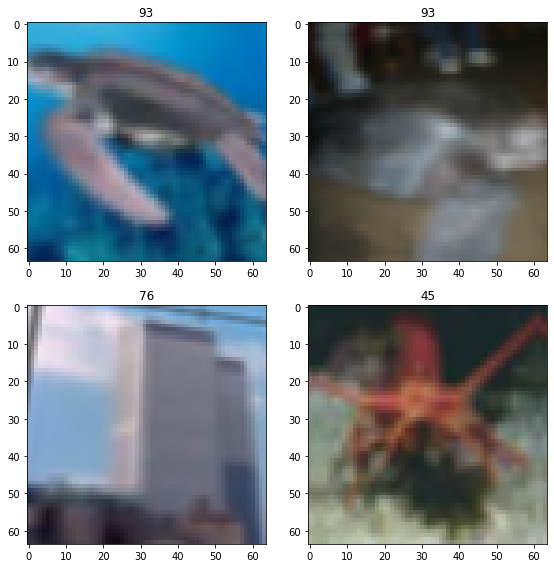

In [41]:
data.show_batch(rows=2, hide_axis=False)

In [42]:
learn = cnn_learner(data, models.resnet18, metrics=[error_rate, accuracy], pretrained=False).mixup()

In [43]:
learn.load('mixup60')

Learner(data=ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
0,0,0,0,0
Path: cifar100;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64),Image (3, 64, 64)
y: CategoryList
0,0,0,0,0
Path: cifar100;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (co

In [13]:
# focal_loss = FocalLoss(alpha=0.25, gamma=2)

In [29]:
# learn.loss_func = old_loss

In [30]:
# ??learn.loss_func

In [17]:
# learn.loss_func = FocalLoss(num_class=100, alpha=0.25, gamma=2)

In [38]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


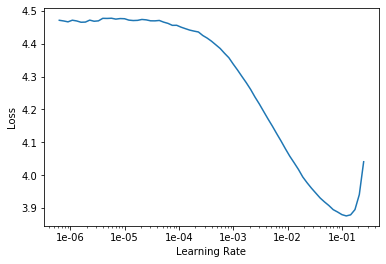

In [39]:
learn.recorder.plot()

In [ ]:
learn.load('mixup60')

In [44]:
learn.fit_one_cycle(200, 6e-3, callbacks=SaveModelCallback(learn, name='resnet18_64'), wd=0.1)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,3.846863,3.049490,0.738200,0.261800,02:01
1,3.502106,2.709878,0.674800,0.325200,01:59
2,3.289765,2.527004,0.638700,0.361300,02:01
3,3.146404,2.373744,0.604500,0.395500,01:59
4,3.035338,2.266037,0.580600,0.419400,01:59
5,2.940037,2.164611,0.555400,0.444600,02:00
6,2.863837,2.074231,0.538800,0.461200,02:01
7,2.793640,2.005782,0.521300,0.478700,01:59
8,2.730376,1.949969,0.513200,0.486800,02:00
9,2.675658,1.892999,0.500900,0.499100,01:59


Better model found at epoch 0 with valid_loss value: 3.049489974975586.
Better model found at epoch 1 with valid_loss value: 2.709878444671631.
Better model found at epoch 2 with valid_loss value: 2.5270040035247803.
Better model found at epoch 3 with valid_loss value: 2.3737435340881348.
Better model found at epoch 4 with valid_loss value: 2.2660372257232666.
Better model found at epoch 5 with valid_loss value: 2.164611339569092.
Better model found at epoch 6 with valid_loss value: 2.0742311477661133.
Better model found at epoch 7 with valid_loss value: 2.005781650543213.
Better model found at epoch 8 with valid_loss value: 1.9499691724777222.
Better model found at epoch 9 with valid_loss value: 1.8929990530014038.
Better model found at epoch 10 with valid_loss value: 1.857261300086975.
Better model found at epoch 11 with valid_loss value: 1.8094871044158936.
Better model found at epoch 12 with valid_loss value: 1.7945715188980103.
Better model found at epoch 13 with valid_loss value:

In [45]:
learn.save('mixup200_64')

### Progressive resizing at 96

In [46]:
data = ImageDataBunch.from_folder(path,
                                  train='train_data',
                                  valid='valid_data',
                                  ds_tfms=get_transforms(),
                                  num_workers=0,
                                  size=96,
                                  bs=1024
                                 ).normalize(cifar100_stats)

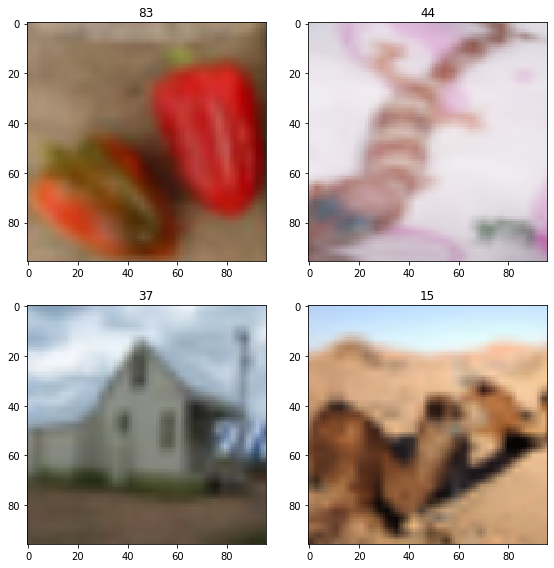

In [47]:
data.show_batch(rows=2, hide_axis=False)

In [48]:
learn = cnn_learner(data, models.resnet18, metrics=[error_rate, accuracy], pretrained=False).mixup()

In [51]:
learn.load('mixup200_64')

Learner(data=ImageDataBunch;

Train: LabelList (50000 items)
x: ImageList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
y: CategoryList
0,0,0,0,0
Path: cifar100;

Valid: LabelList (10000 items)
x: ImageList
Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96),Image (3, 96, 96)
y: CategoryList
0,0,0,0,0
Path: cifar100;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (co

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


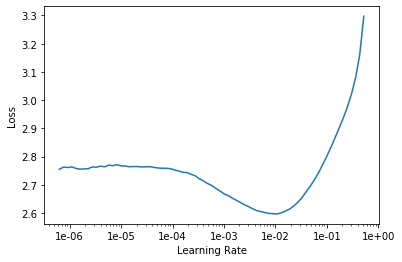

In [50]:
learn.lr_find()
learn.recorder.plot()

In [52]:
learn.fit_one_cycle(200, 6e-3, callbacks=SaveModelCallback(learn, name='resnet18_96'), wd=0.1)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.377882,1.661123,0.412200,0.587800,05:03
1,2.129607,1.507352,0.382500,0.617500,05:21
2,1.984776,1.374036,0.352300,0.647700,05:19
3,1.895817,1.343974,0.349200,0.650800,05:19
4,1.825947,1.340454,0.345700,0.654300,05:16
5,1.771597,1.316296,0.339400,0.660600,05:20
6,1.718090,1.285329,0.330700,0.669300,05:43
7,1.676764,1.318950,0.339100,0.660900,05:10
8,1.631021,1.306450,0.335200,0.664800,05:08
9,1.598849,1.314645,0.329300,0.670700,05:05


Better model found at epoch 0 with valid_loss value: 1.6611227989196777.
Better model found at epoch 1 with valid_loss value: 1.5073521137237549.
Better model found at epoch 2 with valid_loss value: 1.3740355968475342.
Better model found at epoch 3 with valid_loss value: 1.3439741134643555.
Better model found at epoch 4 with valid_loss value: 1.3404537439346313.
Better model found at epoch 5 with valid_loss value: 1.3162963390350342.
Better model found at epoch 6 with valid_loss value: 1.285328984260559.
Better model found at epoch 146 with valid_loss value: 1.2839720249176025.
Better model found at epoch 153 with valid_loss value: 1.261664867401123.
Better model found at epoch 154 with valid_loss value: 1.2602170705795288.
Better model found at epoch 156 with valid_loss value: 1.2589538097381592.
Better model found at epoch 157 with valid_loss value: 1.249674916267395.
Better model found at epoch 158 with valid_loss value: 1.2473558187484741.
Better model found at epoch 160 with valid

KeyboardInterrupt: 

In [54]:
learn.fit_one_cycle(200, 6e-3, callbacks=SaveModelCallback(learn, name='resnet18_96'), start_epoch=190, wd=0.1)

Model resnet18_96_189 not found.


epoch,train_loss,valid_loss,error_rate,accuracy,time
190,1.101661,1.121069,0.271100,0.728900,09:26
191,1.100825,1.120704,0.270400,0.729600,09:20
192,1.101887,1.118360,0.269300,0.730700,09:35
193,1.101907,1.118413,0.269900,0.730100,09:31
194,1.094354,1.116621,0.269200,0.730800,09:45
195,1.095901,1.117548,0.270300,0.729700,10:18
196,1.100624,1.118221,0.270600,0.729400,10:05
197,1.101241,1.118563,0.270100,0.729900,10:22
198,1.095058,1.117949,0.269900,0.730100,09:53
199,1.090695,1.118525,0.269700,0.730300,09:48


Better model found at epoch 190 with valid_loss value: 1.1210688352584839.
Better model found at epoch 191 with valid_loss value: 1.1207038164138794.
Better model found at epoch 192 with valid_loss value: 1.118359923362732.
Better model found at epoch 194 with valid_loss value: 1.116620659828186.


In [55]:
learn.fit_one_cycle(200, 6e-3, callbacks=SaveModelCallback(learn, name='resnet18_96'), start_epoch=180, wd=0.1)

Model resnet18_96_179 not found.


epoch,train_loss,valid_loss,error_rate,accuracy,time
180,1.094906,1.130792,0.273000,0.727000,09:41
181,1.098977,1.127657,0.269500,0.730500,10:06
182,1.097976,1.138801,0.274200,0.725800,09:50
183,1.095390,1.123351,0.272300,0.727700,09:56
184,1.101347,1.128708,0.268700,0.731300,09:54
185,1.103541,1.120545,0.268600,0.731400,09:52
186,1.099746,1.120214,0.268000,0.732000,10:03
187,1.097616,1.120989,0.267300,0.732700,10:05
188,1.097357,1.115846,0.266700,0.733300,10:05
189,1.097059,1.115217,0.268000,0.732000,10:08


Better model found at epoch 180 with valid_loss value: 1.1307923793792725.
Better model found at epoch 181 with valid_loss value: 1.1276568174362183.
Better model found at epoch 183 with valid_loss value: 1.123350977897644.
Better model found at epoch 185 with valid_loss value: 1.1205447912216187.
Better model found at epoch 186 with valid_loss value: 1.1202138662338257.
Better model found at epoch 188 with valid_loss value: 1.115845799446106.
Better model found at epoch 189 with valid_loss value: 1.115216612815857.
Better model found at epoch 191 with valid_loss value: 1.1131374835968018.
Better model found at epoch 192 with valid_loss value: 1.1120959520339966.
Better model found at epoch 193 with valid_loss value: 1.1112138032913208.


In [57]:
learn.fit_one_cycle(220, 6e-3, callbacks=SaveModelCallback(learn, name='resnet18_96__'), start_epoch=180, wd=0.1)

Model resnet18_96___179 not found.


epoch,train_loss,valid_loss,error_rate,accuracy,time
180,1.109538,1.212131,0.291400,0.708600,10:31
181,1.123748,1.206399,0.291200,0.708800,10:27
182,1.123520,1.196451,0.286100,0.713900,10:33
183,1.123557,1.203960,0.287800,0.712200,10:37
184,1.120785,1.189389,0.283300,0.716700,10:43
185,1.120251,1.191710,0.284500,0.715500,10:46
186,1.121703,1.191914,0.283900,0.716100,11:08
187,1.112743,1.173061,0.282100,0.717900,10:50
188,1.110120,1.180446,0.283800,0.716200,10:45
189,1.114519,1.180402,0.286400,0.713600,10:50


Better model found at epoch 180 with valid_loss value: 1.2121307849884033.
Better model found at epoch 181 with valid_loss value: 1.2063989639282227.
Better model found at epoch 182 with valid_loss value: 1.1964513063430786.
Better model found at epoch 184 with valid_loss value: 1.189388632774353.
Better model found at epoch 187 with valid_loss value: 1.173061490058899.
Better model found at epoch 190 with valid_loss value: 1.1564682722091675.


KeyboardInterrupt: 